### Практическое задание

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

#### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [3]:
pjme_data = pd.read_csv('my_PJME_MW.csv', sep = ',', index_col=[0], parse_dates=[0])
pjme_data.head(2)

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0


In [4]:
pjme_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,145374.0,32079.773047,6464.167501,14544.0,27573.0,31421.0,35648.75,62009.0
year,145374.0,2009.801340,4.791885,2002.0,2006.0,2010.0,2014.00,2018.0
month,145374.0,6.435979,3.438982,1.0,3.0,6.0,9.00,12.0
dayofmonth,145374.0,15.722681,8.801258,1.0,8.0,16.0,23.00,31.0
quarter,145374.0,2.481241,1.114448,1.0,1.0,2.0,3.00,4.0
dayofyear,145374.0,180.459835,105.138073,1.0,90.0,179.0,271.00,366.0
weekofyear,145374.0,26.218643,15.019836,1.0,13.0,26.0,39.00,53.0
dayofweek,145374.0,2.999168,1.999572,0.0,1.0,3.0,5.00,6.0
hour,145374.0,11.501101,6.921927,0.0,6.0,12.0,18.00,23.0
is_holiday,145374.0,0.027233,0.162763,0.0,0.0,0.0,0.00,1.0


Text(0.5, 0, 't')

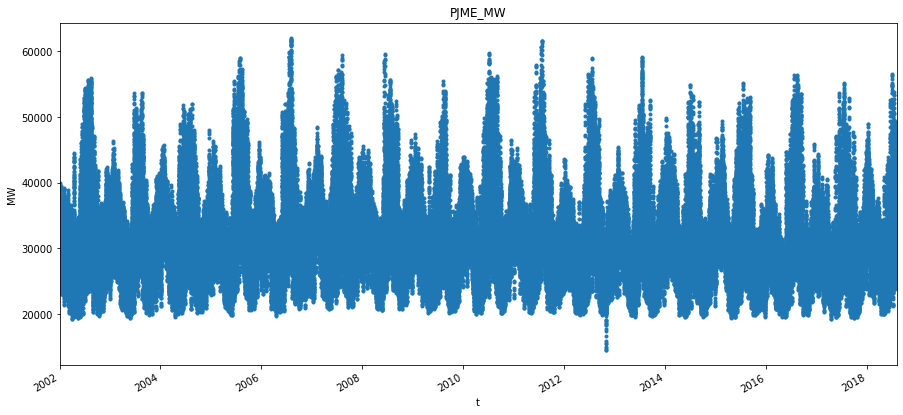

In [5]:
_ = pjme_data['PJME_MW'].plot(style='.', figsize=(15, 7), title='PJME_MW')
plt.ylabel('MW')
plt.xlabel('t')

In [6]:
pjme_data_w = pjme_data.resample('W').mean()
pjme_data_w.head(2)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.0,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.0,0.167832
2002-01-13,31487.386905,2002.0,1.0,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.0,0.000000


In [7]:
pjme_data_w.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,866.0,32081.930877,3982.384374,24577.173653,28791.333333,31424.488095,34817.644345,46761.494048
year,866.0,2009.803365,4.797106,2002.000000,2006.000000,2010.000000,2014.000000,2018.000000
month,866.0,6.435416,3.381168,1.000000,3.607143,6.071429,9.000000,12.000000
dayofmonth,866.0,15.720369,6.828859,3.517483,10.000000,16.000000,21.142857,28.000000
quarter,866.0,2.481181,1.098205,1.000000,1.607143,2.214286,3.000000,4.000000
dayofyear,866.0,180.440136,103.247833,3.517483,91.986527,178.500000,269.000000,362.000000
weekofyear,866.0,26.215935,15.027629,1.000000,13.000000,26.000000,39.000000,53.000000
dayofweek,866.0,2.998533,0.053246,1.525773,3.000000,3.000000,3.000000,3.517483
hour,866.0,11.501072,0.013025,11.381443,11.500000,11.500000,11.500000,11.580420
is_holiday,866.0,0.027240,0.056181,0.000000,0.000000,0.000000,0.000000,0.160839


Text(0.5, 0, 't')

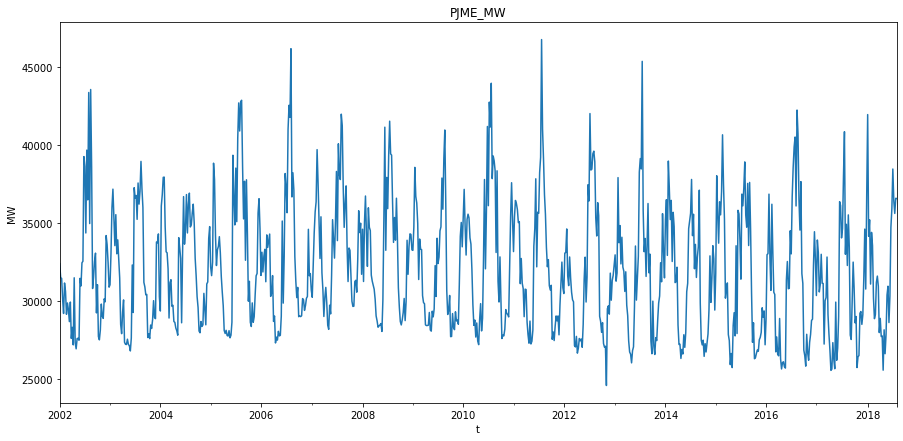

In [8]:
_ = pjme_data_w['PJME_MW'].plot(style='-', figsize=(15, 7), title='PJME_MW')
plt.ylabel('MW')
plt.xlabel('t')

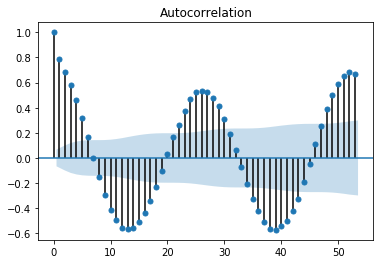

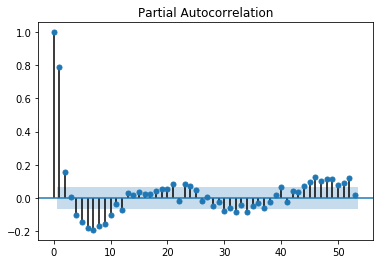

In [9]:
sm.graphics.tsa.plot_acf(pjme_data_w['PJME_MW'].values, lags=53)
plt.show()

sm.graphics.tsa.plot_pacf(pjme_data_w['PJME_MW'].values, lags=53)
plt.show()

#### 2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков.

In [10]:
columns_to_drop = ['year', 'month', 'dayofmonth', 'quarter', 'dayofyear', 'dayofweek', 'hour', 'is_holiday', 'is_prev_holiday', 'is_next_holiday']

pjme_data_w.drop(columns=columns_to_drop, inplace=True)


In [11]:
pjme_data_w.head(2)

,PJME_MW,weekofyear
Date,,
2002-01-06,32392.160839,1.0
2002-01-13,31487.386905,2.0


In [12]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [13]:
pjme_data_w['avg_13w'] = pjme_data_w['PJME_MW'].rolling(window=13).mean()
pjme_data_w['avg_26w'] = pjme_data_w['PJME_MW'].rolling(window=26).mean()
pjme_data_w['avg_39w'] = pjme_data_w['PJME_MW'].rolling(window=39).mean()
pjme_data_w['avg_52w'] = pjme_data_w['PJME_MW'].rolling(window=52).mean()
pjme_data_w['exp_0_01'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.01)
pjme_data_w['exp_0_02'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.02)
pjme_data_w['exp_0_03'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.03)
pjme_data_w['exp_0_04'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.04)
pjme_data_w['exp_0_05'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.05)
pjme_data_w['exp_0_06'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.06)
pjme_data_w['exp_0_07'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.07)
pjme_data_w['exp_0_08'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.08)
pjme_data_w['exp_0_09'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.09)
pjme_data_w['exp_0_10'] = exponential_smoothing(pjme_data_w['PJME_MW'], 0.10)
pjme_data_w['diff_1'] = pjme_data_w.PJME_MW.diff(1)
pjme_data_w['diff_1_l'] = pjme_data_w['diff_1'].apply(lambda x: np.log(x))
pjme_data_w['diff_1_d'] = pjme_data_w['diff_1'] / pjme_data_w['PJME_MW']
pjme_data_w.fillna(0, inplace=True)

In [14]:
pjme_data_w.head(2)

,PJME_MW,weekofyear,avg_13w,avg_26w,avg_39w,avg_52w,exp_0_01,exp_0_02,exp_0_03,exp_0_04,exp_0_05,exp_0_06,exp_0_07,exp_0_08,exp_0_09,exp_0_10,diff_1,diff_1_l,diff_1_d
Date,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.0,0.0,0.0,0.0,0.0,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,0.000000,0.0,0.000000
2002-01-13,31487.386905,2.0,0.0,0.0,0.0,0.0,32383.113100,32374.065360,32365.017621,32355.969882,32346.922142,32337.874403,32328.826664,32319.778924,32310.731185,32301.683446,-904.773934,0.0,-0.028734


In [15]:
p = 13

for i in range(p):
    pjme_data_w['t_'+str(p-i)] = 0
    pjme_data_w['t_'+str(p-i)].values[p:] = pjme_data_w['PJME_MW'].values[i:-(p)+i]

In [16]:
p = 13

for i in range(p):
    pjme_data_w['d_'+str(p-i)] = 0
    pjme_data_w['d_'+str(p-i)].values[p:] = pjme_data_w['diff_1'].values[i:-(p)+i]

In [17]:
pjme_data_w.head(2)

,PJME_MW,weekofyear,avg_13w,avg_26w,avg_39w,avg_52w,exp_0_01,exp_0_02,exp_0_03,exp_0_04,...,d_10,d_9,d_8,d_7,d_6,d_5,d_4,d_3,d_2,d_1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.0,0.0,0.0,0.0,0.0,32392.160839,32392.160839,32392.160839,32392.160839,...,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,2.0,0.0,0.0,0.0,0.0,32383.113100,32374.065360,32365.017621,32355.969882,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def split_data(data, index, split_date):
    return data.loc[data.index.get_level_values(index) <= split_date].copy(), \
           data.loc[data.index.get_level_values(index) >  split_date].copy()

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [19]:
train, test = split_data(pjme_data_w.iloc[51:, :], 'Date', '30-06-2016')

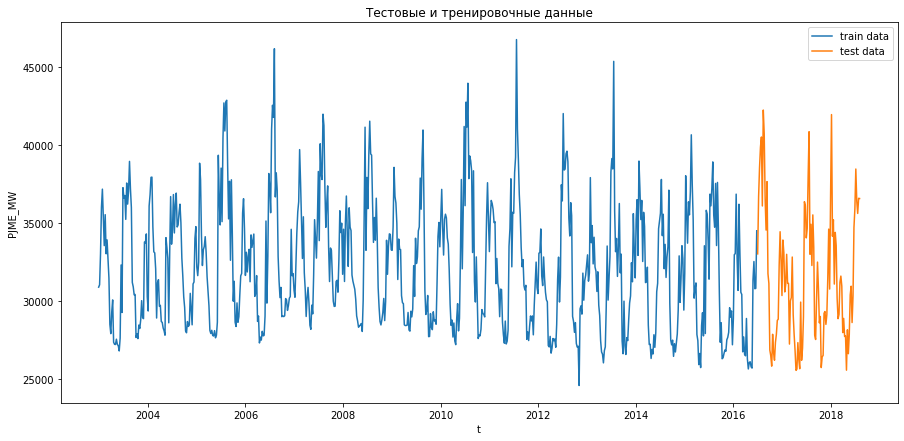

In [20]:
h = 4

X_train = train.iloc[:-h, :]
y_train = train['PJME_MW'].values[h:]
X_test = test.iloc[:-h, :]
y_test = test['PJME_MW'].values[h:]

plt.figure(figsize=(15, 7))
plt.xlabel('t')
plt.ylabel('PJME_MW')
plt.plot(train.index.get_level_values('Date'), train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'), test['PJME_MW'], label='test data')
plt.title('Тестовые и тренировочные данные')
plt.legend()
plt.show()


In [21]:
tscv = TimeSeriesSplit(n_splits=5)

estimator = GradientBoostingRegressor(n_estimators=100, random_state=42)


In [22]:
rfecv = RFECV(estimator, step=1, min_features_to_select=1, cv=tscv, scoring='neg_mean_squared_error', n_jobs=1)

rfecv.fit(X_train, y_train)

rfecv_features = list(X_train.columns[rfecv.get_support()])

print(rfecv_features)


['PJME_MW', 'weekofyear', 'avg_26w', 't_11', 't_10', 't_9', 't_8', 't_7']


In [23]:
sfm = SelectFromModel(estimator, max_features=len(rfecv_features))

sfm.fit(X_train, y_train)

sfm_features = list(X_train.columns[sfm.get_support()])

print(sfm_features)


['PJME_MW', 'weekofyear', 'avg_26w', 't_11', 't_10', 't_9', 't_8', 't_7']


In [24]:
features = []

for feature in rfecv_features:
    if feature in sfm_features:
        features.append(feature)
        
print(features)


['PJME_MW', 'weekofyear', 'avg_26w', 't_11', 't_10', 't_9', 't_8', 't_7']


In [25]:
X_train_, X_test_ = X_train.loc[:, features], X_test.loc[:, features]

regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

params = {
    'n_estimators': np.array(range(10, 110, 10)),
    'max_depth': np.array(range(2, 7, 1))
}

search = GridSearchCV(regressor, param_grid=params, scoring='neg_mean_squared_error', cv=tscv, n_jobs=1)

search.fit(X_train_, y_train)

print(search.best_params_)


{'max_depth': 3, 'n_estimators': 50}


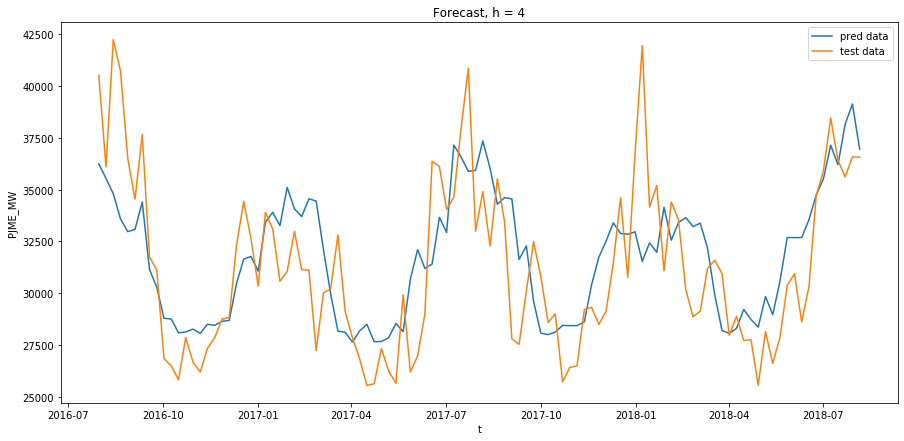

MSE (h = 4): 8546854.5389
MAE (h = 4): 2318.3429
R^2 (h = 4): 0.4803
MAPE (h = 4): 7.3984%
RMSE (h = 4): 2923.5004


In [26]:
search.best_estimator_.fit(X_train_, y_train) 

y_test_pred = search.best_estimator_.predict(X_test_)

plt.figure(figsize=(15, 7))

plt.title('Forecast, h = 4')

plt.xlabel('t')
plt.ylabel('PJME_MW')
plt.plot(test.index[h:], y_test_pred, label='pred data')
plt.plot(test.index[h:], y_test, label='test data')

plt.legend()
plt.show()

print(f'MSE (h = 4): {np.round(mean_squared_error(y_test, y_test_pred), 4)}')
print(f'MAE (h = 4): {np.round(mean_absolute_error(y_test, y_test_pred), 4)}')
print(f'R^2 (h = 4): {np.round(r2_score(y_test, y_test_pred), 4)}')
print(f'MAPE (h = 4): {np.round(mean_absolute_percentage_error(y_test, y_test_pred), 4)}%')
print(f'RMSE (h = 4): {np.round(root_mean_squared_error(y_test, y_test_pred), 4)}')


#### 3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

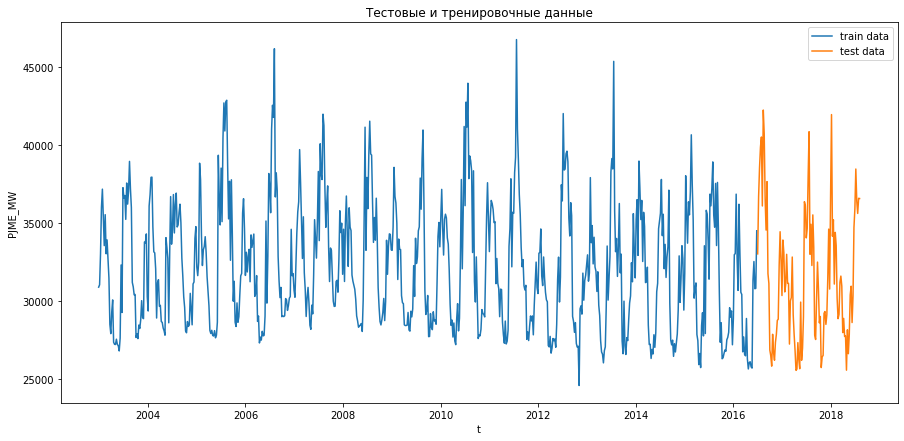

In [27]:
h = 1

X_train = train.iloc[:-h, :]
y_train = train['PJME_MW'].values[h:]
X_test = test.iloc[:-h, :]
y_test = test['PJME_MW'].values[h:]

plt.figure(figsize=(15, 7))
plt.xlabel('t')
plt.ylabel('PJME_MW')
plt.plot(train.index.get_level_values('Date'), train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'), test['PJME_MW'], label='test data')
plt.title('Тестовые и тренировочные данные')
plt.legend()
plt.show()


In [28]:
rfecv = RFECV(estimator, step=1, min_features_to_select=1, cv=tscv, scoring='neg_mean_squared_error', n_jobs=1)

rfecv.fit(X_train, y_train)

rfecv_features = list(X_train.columns[rfecv.get_support()])

print(rfecv_features)


['PJME_MW', 'weekofyear', 't_13', 't_11', 't_10', 't_9']


In [29]:
sfm = SelectFromModel(estimator, max_features=len(rfecv_features))

sfm.fit(X_train, y_train)

sfm_features = list(X_train.columns[sfm.get_support()])

print(sfm_features)


['PJME_MW', 't_13', 't_11', 't_10']


In [30]:
features = []

for feature in rfecv_features:
    if feature in sfm_features:
        features.append(feature)
        
print(features)


['PJME_MW', 't_13', 't_11', 't_10']


In [31]:
X_train_, X_test_ = X_train.loc[:, features], X_test.loc[:, features]

regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

params = {
    'n_estimators': np.array(range(10, 110, 10)),
    'max_depth': np.array(range(2, 7, 1))
}

search = GridSearchCV(regressor, param_grid=params, scoring='neg_mean_squared_error', cv=tscv, n_jobs=1)

search.fit(X_train_, y_train)

print(search.best_params_)


{'max_depth': 2, 'n_estimators': 40}


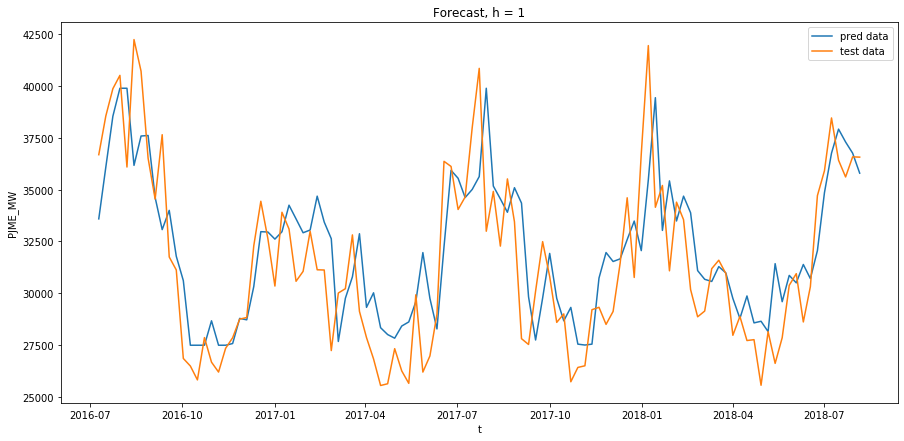

MSE (h = 1): 6818643.8766
MAE (h = 1): 2038.2788
R^2 (h = 1): 0.6079
MAPE (h = 1): 6.5374%
RMSE (h = 1): 2611.2533


In [32]:
search.best_estimator_.fit(X_train_, y_train) 

y_test_pred = search.best_estimator_.predict(X_test_)

plt.figure(figsize=(15, 7))

plt.title('Forecast, h = 1')

plt.xlabel('t')
plt.ylabel('PJME_MW')
plt.plot(test.index[h:], y_test_pred, label='pred data')
plt.plot(test.index[h:], y_test, label='test data')

plt.legend()
plt.show()

print(f'MSE (h = 1): {np.round(mean_squared_error(y_test, y_test_pred), 4)}')
print(f'MAE (h = 1): {np.round(mean_absolute_error(y_test, y_test_pred), 4)}')
print(f'R^2 (h = 1): {np.round(r2_score(y_test, y_test_pred), 4)}')
print(f'MAPE (h = 1): {np.round(mean_absolute_percentage_error(y_test, y_test_pred), 4)}%')
print(f'RMSE (h = 1): {np.round(root_mean_squared_error(y_test, y_test_pred), 4)}')


#### 4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

In [33]:
h = 4

X_train = train.iloc[:-h, :]
y_train = train['PJME_MW'].values[h:]
X_test = test.iloc[:-h, :]
y_test = test['PJME_MW'].values[h:]

features = ['PJME_MW', 'weekofyear', 'avg_26w', 't_11', 't_10', 't_9', 't_8', 't_7']

X_train_, X_test_ = X_train.loc[:, features], X_test.loc[:, features]

regressor = GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)

regressor.fit(X_train_, y_train) 

y_test_pred = regressor.predict(X_test_)


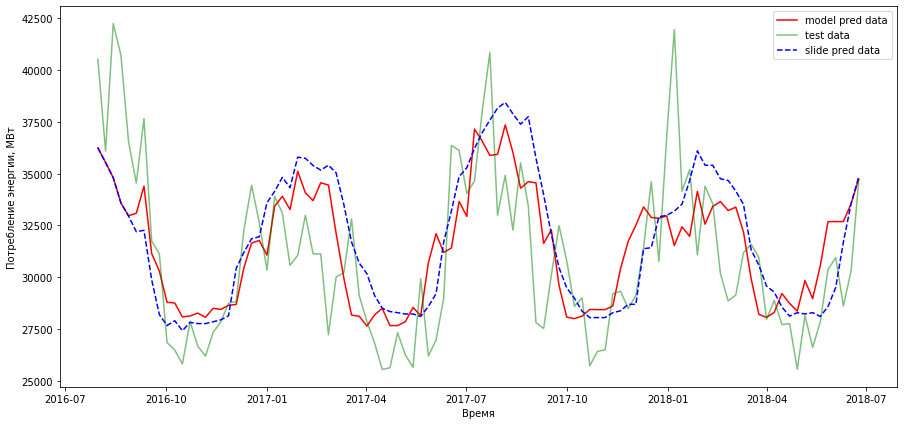

In [34]:
# ['PJME_MW', 'weekofyear', 'avg_26w', 't_11', 't_10', 't_9', 't_8', 't_7']

X_test_slide = X_test_.copy()
y_test_slide = y_test_pred.copy()

n = 100

for i in range(n):
    
    y_test_slide[i] = regressor.predict(np.nan_to_num(X_test_slide.iloc[i, :].values.reshape(-1, len(features))).astype('float64'))

    X_test_slide.iloc[i+h, 0] = y_test_slide[i]
        
    X_test_slide.iloc[i+h, 2] = float(np.mean(X_test_slide.iloc[i+h-26:i+h, 0]))
    
    if i > p:
        
        X_test_slide.iloc[i+h, 3] = X_test_slide.values[i+h-11, 0].astype('int64')
        X_test_slide.iloc[i+h, 4] = X_test_slide.values[i+h-10, 0].astype('int64')
        X_test_slide.iloc[i+h, 5] = X_test_slide.values[i+h-9, 0].astype('int64')
        X_test_slide.iloc[i+h, 6] = X_test_slide.values[i+h-8, 0].astype('int64')
        X_test_slide.iloc[i+h, 7] = X_test_slide.values[i+h-7, 0].astype('int64')

        
plt.figure(figsize=(15, 7))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h:n+h], y_test_pred[:n], 'r',label='model pred data' )
plt.plot(test.index[h:n+h], y_test[:n], 'g',label='test data', alpha=0.5)
plt.plot(test.index[h:n+h], y_test_slide[:n], '--b',label='slide pred data')

plt.legend()
plt.show()

Результат прямого моделирования:

In [35]:
print(f'MSE (h = 4): {np.round(mean_squared_error(y_test[:n], y_test_pred[:n]), 4)}')
print(f'MAE (h = 4): {np.round(mean_absolute_error(y_test[:n], y_test_pred[:n]), 4)}')
print(f'R^2 (h = 4): {np.round(r2_score(y_test[:n], y_test_pred[:n]), 4)}')
print(f'MAPE (h = 4): {np.round(mean_absolute_percentage_error(y_test[:n], y_test_pred[:n]), 4)}%')
print(f'RMSE (h = 4): {np.round(root_mean_squared_error(y_test[:n], y_test_pred[:n]), 4)}')

MSE (h = 4): 8908463.8727
MAE (h = 4): 2383.3637
R^2 (h = 4): 0.4284
MAPE (h = 4): 7.6394%
RMSE (h = 4): 2984.705


Результат рекурсивного моделирования:

In [36]:
print(f'MSE (h = 4): {np.round(mean_squared_error(y_test[:n], y_test_slide[:n]), 4)}')
print(f'MAE (h = 4): {np.round(mean_absolute_error(y_test[:n], y_test_slide[:n]), 4)}')
print(f'R^2 (h = 4): {np.round(r2_score(y_test[:n], y_test_slide[:n]), 4)}')
print(f'MAPE (h = 4): {np.round(mean_absolute_percentage_error(y_test[:n], y_test_slide[:n]), 4)}%')
print(f'RMSE (h = 4): {np.round(root_mean_squared_error(y_test[:n], y_test_slide[:n]), 4)}')

MSE (h = 4): 9706502.1764
MAE (h = 4): 2417.3627
R^2 (h = 4): 0.3772
MAPE (h = 4): 7.7351%
RMSE (h = 4): 3115.526


Результат прямого моделирования оказался несколько лучше, чем результат рекурсивного моделирования. Это связано с тем, что предсказывая рекурсивно, наше следующее предсказание зависит от предыдущего, таким образом мы вносим дополнительную погрешность в данные, связанную с ошибкой наших предыдущих прогнозов. 

#### 5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10*i-й до (i+1)*10 -й,... ,от 90 до 100-й точках (используйте осреденение по десяткам точек).

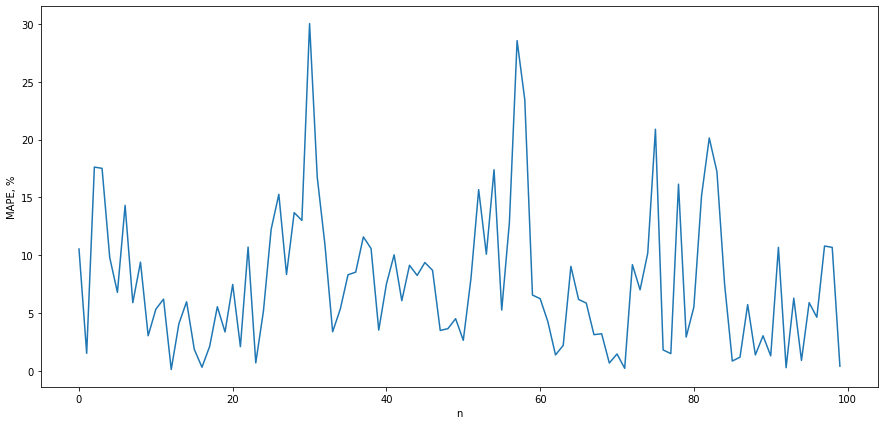

In [37]:
errors = {}

for i in range(100):
    
    errors[i] = np.round(mean_absolute_percentage_error(y_test[i], y_test_slide[i]), 4)
    
errors = pd.DataFrame({'key': list(errors.keys()), 'value': list(errors.values())})

plt.figure(figsize=(15, 7))

plt.xlabel('n')
plt.ylabel('MAPE, %')

plt.plot(errors.key, errors.value)

plt.show()

In [38]:
print(errors.groupby(np.floor(errors.key / 10).values.astype('int64')).value.mean())

0     9.64250
1     3.49761
2     8.87060
3    10.89443
4     7.07612
5    13.04565
6     4.22385
7     7.13627
8     7.77248
9     5.19164
Name: value, dtype: float64


In [39]:
pvalue = sm.tsa.stattools.adfuller(errors['value'].values, regression='ctt')[1]

print(f'Augmented Dickey-Fuller test p-value: {np.round(pvalue, 4)}')


Augmented Dickey-Fuller test p-value: 0.0


#### 6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

Поведение ошибки похоже на случайный шум. Подтверждение этому дает результат теста Дики-Фуллера (p-value), который позволяет сделать вывод о том, что ряд ошибок является стационарным.